# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import scipy.stats as st
import warnings
import copy
warnings.filterwarnings("ignore")
#pd.options.display.max_rows=950

Read csv file and see the shape of the data

In [5]:
df=pd.read_csv("newdata_fifa.csv")
pd.pandas.set_option('display.max_columns',None)
#pd.pandas.set_option('display.max_rows',None)
df.shape

(18179, 74)

Display 5 random rows of a dataset

In [6]:
df.sample(5)

,Unnamed: 0,Name,Age,OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,W/F,SM,A/W,D/W,IR,Body Type,PAC,SHO,PAS,DRI,DEF,PHY,national
8544,NaN,22 B. Kukułowicz LB RB,20,61,67,Bruk-Bet Termalica Nieciecza\n2021 ~ 2023,263134,181cm,72kg,Right,61,LB,6,"Jul 7, 2021",NaN,€475K,€1K,€736K,228,57,42,53,54,22.0,231,54,44.0,32,45,56,345,78,76,71.0,55,65.0,295,51,68.0,72,71,33,223,54,55.0,37.0,38.0,39,44.0,163,56,55,52.0,55,11,11,11,15,7,1540,345,3,2,High,Medium,1,Lean (170-185),77,41,48,56,55,68,Saudi Arabia
1880,NaN,A. Palumbo CM CDM CAM,25,69,72,Ternana\n2021 ~ 2025,224982,182cm,78kg,Right,71,CAM,3,"Jun 15, 2021",NaN,€1.8M,€3K,€2.9M,279,56,59,48,75,41.0,334,70,59.0,65,68,72,344,71,64,75.0,65,69.0,366,56,88.0,82,77,63,301,54,63.0,58.0,71.0,55,63.0,169,53,60,56.0,61,10,16,13,14,8,1854,395,3,2,Medium,Medium,1,Lean (170-185),67,58,68,70,57,74,Austria
12452,NaN,Nuno Borges CDM,34,67,67,Casa Pia\n2021 ~ 2023,257094,184cm,77kg,Right,67,CDM,0,"Jul 1, 2021",NaN,€350K,€2K,€718K,257,51,44,60,67,35.0,275,65,43.0,35,66,66,295,55,51,60.0,65,64.0,309,53,71.0,54,80,51,291,66,65.0,56.0,63.0,41,65.0,195,65,67,63.0,64,12,14,14,14,10,1686,360,2,2,Medium,Medium,1,Normal (170-185),53,47,60,65,65,70,Saudi Arabia
6499,"FIFA 23 Sep 1, 202252 64 Finishing64 65 Drib...",S. Medina LM CAM RM,22,66,75,Patronato\n2021 ~ 2023,267392,178cm,67kg,Left,67,LM,9,"Jan 1, 2021",NaN,€1.9M,€4K,€3.1M,282,61,64,46,61,50.0,285,65,51.0,46,57,66,357,74,76,70.0,65,72.0,291,67,39.0,67,55,63,286,53,45.0,59.0,64.0,65,61.0,151,48,55,48.0,58,11,13,8,13,13,1710,371,3,3,Medium,Medium,1,Normal (170-185),75,64,60,66,49,57,Japan
17807,"FIFA 23 Sep 1, 202235 39 Curve",H. Mashiane LB LM,24,62,68,Kaizer Chiefs\n2019 ~ 2023,247017,175cm,71kg,Left,63,LWB,6,"Jan 22, 2019",NaN,€600K,€500,€1.4M,222,63,32,41,58,28.0,269,66,39.0,44,58,62,329,77,67,65.0,52,68.0,245,33,55.0,65,61,31,266,53,58.0,65.0,49.0,41,49.0,176,54,64,58.0,47,9,11,14,6,7,1554,343,3,2,Medium,Medium,1,Normal (170-185),72,34,56,63,57,60,United States


Display the information about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18179 entries, 0 to 18178
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6671 non-null   object 
 1   Name              18179 non-null  object 
 2   Age               18179 non-null  int64  
 3   OVA               18179 non-null  int64  
 4   POT               18179 non-null  int64  
 5   Team & Contract   18179 non-null  object 
 6   ID                18179 non-null  int64  
 7   Height            18179 non-null  object 
 8   Weight            18179 non-null  object 
 9   foot              18179 non-null  object 
 10  BOV               18179 non-null  int64  
 11  BP                18179 non-null  object 
 12  Growth            18179 non-null  int64  
 13  Joined            18175 non-null  object 
 14  Loan Date End     687 non-null    object 
 15  Value             18179 non-null  object 
 16  Wage              18179 non-null  object

Renaming the columns

In [8]:
df.rename(columns={'OVA':'Overall_rating','POT':'Potential','BOV':'Best_overall','BP':'Best_position','W/F':'Weak_foot','SM':'Skill_moves','A/W':'Attacking_WorkRate','D/W':'Defensive_WorkRate','PAC':'Pace/Diving','SHO':'Shooting/Handling','PAS':'Passing/Kicking','DRI':'Dribling/Reflexes','DEF':'Defending/Pace','PHY':'Physical/Positioning'},inplace=True)

In [9]:
#Removal of unwanted Observatoins
df.drop(['Unnamed: 0','Loan Date End'],inplace=True,axis=1)

Droping duplicate rows

In [10]:
df=df.drop_duplicates(ignore_index=True)

In [11]:
df.shape

(17438, 72)

In [12]:
df['Best_position'].unique()

array(['CAM', 'RM', 'CB', 'CM', 'CDM', 'LW', 'ST', 'LM', 'LB', 'LWB',
       'GK', 'RWB', 'RB', 'RW', 'CF'], dtype=object)

# Cleaning name column
isinstance(): Returns True if a specified object is an instance of a specified object


In [22]:
def clean_name(Name):
    if isinstance(Name,str):
        out = Name.replace('CM', '')
        if 'CAM' in out:
            out = out.replace('CAM', '')
        elif 'RWB' in Name:
            out = out.replace('RWB', '')
        elif 'LM' in Name:
            out = out.replace('LM', '')    
        elif 'CB' in Name:
            out = out.replace('CB', '')
        elif 'ST' in Name:
            out = out.replace('ST', '')
        elif 'LW' in Name:
            out = out.replace('LW', '')
        elif 'RW' in Name:
            out = out.replace('RW', '')
        elif 'RM' in Name:
            out = out.replace('RM', '')
        elif 'GK' in Name:
            out = out.replace('GK', '')
        elif 'LWB' in Name:
            out = out.replace('LWB', '')    
        elif 'RWB' in Name:
            out = out.replace('RWB', '') 
        elif 'CDM' in Name:
            out = out.replace('CDM', '')
        elif 'LB' in Name:
            out = out.replace('LB', '')
        elif 'CF' in Name:
            out = out.replace('CF', '')
        elif 'RB' in Name:
            out = out.replace('RB', '')
        elif 'RF' in Name:
            out = out.replace('RF', '')  
        return out
    
df['Name'] = df['Name'].apply(lambda x: clean_name(x))

In [23]:
name=df['Name'].str.split(' ',n=1,expand=True)
df['a']=name[0]
df['b']=name[1]

In [24]:
cl=df['a']
for i in range(len(cl)):
        ax=cl[i].split("\xa0")
        ay=ax[-1]
        print(ax)
        cl[i]=ay

['J.']
['K.']
['K.']
['M.']
['R.']
['A.']
['G.']
['W.']
['J.']
['J.']
['J.']
['S.']
['D.']
['X.']
['Moleiro']
['F.']
['J.']
['C.']
['R.']
['Rafael']
['G.']
['D.']
['J.']
['D.']
['J.']
['Y.']
['Gavi']
['K.']
['Antony']
['A.']
['M.']
['F.']
['E.']
['M.']
['F.']
['L.']
['Cristiano']
['D.']
['N.']
['P.']
['Gabriel']
['E.']
['C.']
['C.']
['Nuno']
['F.']
['Pedri']
['Gonçalo']
['G.']
['Vitinha']
['Vitinha']
['D.']
['D.']
['A.']
['D.']
['K.']
['G.']
['S.']
['R.']
['S.']
['T.']
['M.']
['M.']
['V.']
['Gonçalo']
['A.']
['M.']
['I.']
['A.']
['W.']
['D.']
['J.']
['A.']
['R.']
['K.']
['B.']
['B.']
['M.']
['E.']
['M.']
['Yeremy']
['T.']
['A.']
['A.']
['T.']
['C.']
['G.']
['W.']
['P.']
['B.']
['K.']
['M.']
['Vinícius']
['G.']
['A.']
['C.']
['22', 'Alejandro']
['H.']
['G.']
['M.']
['L.']
['G.']
['P.']
['M.']
['Pedro']
['M.']
['F.']
['L.']
['A.']
['Diogo']
['G.']
['B.']
['T.']
['Gabriel']
['A.']
['C.']
['F.']
['R.']
['G.']
['H.']
['P.']
['Gabriel']
['J.']
['A.']
['E.']
['R.']
['H.']
['W.']
['N.']
['Pabl

In [26]:
df['Name'] = df['a'] +' '+df['b']

# Cleaning Team & Contract column

In [27]:
tc=df['Team & Contract'].str.split('\n',n=0,expand=True)
df['Team']=tc[0]
df['Contract_end_year']=tc[1]

In [28]:
t=df['Contract_end_year']
for i in range(len(t)):
        x=t[i].split("~")
        y=x[-1]
        t[i]=y

Cleaning Height column

In [29]:
h=df['Height']
for i in range(len(h)):
        hi=h[i].replace("cm","")
        h[i]=hi

Cleaning weight column

In [30]:
w=df['Weight']
for i in range(len(w)):
    we=w[i].replace('kg','')
    w[i]=we

Cleaning value,Wage and Release Claues column

In [31]:
def value_conversion(Value):
    if isinstance(Value,str):
        out = Value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in Value:
            out = float(out.replace('K', ''))*1000
        return float(out)


df['Value']=df['Value'].apply(lambda x: value_conversion(x))
df['Wage']=df['Wage'].apply(lambda x: value_conversion(x))
df['Release Clause']=df['Release Clause'].apply(lambda x: value_conversion(x))

Cleaning Body Type column

In [32]:
bt=df['Body Type']
for i in range(len(bt)):
        x=bt[i].split("(")
        y=x[0]
        bt[i]=y

Droping the columns

In [33]:
df.drop(["Team & Contract","a","b"],inplace=True,axis=1)

In [34]:
df[df['Value']==0.0]

,Name,Age,Overall_rating,Potential,ID,Height,Weight,foot,Best_overall,Best_position,Growth,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,Weak_foot,Skill_moves,Attacking_WorkRate,Defensive_WorkRate,IR,Body Type,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribling/Reflexes,Defending/Pace,Physical/Positioning,national,Team,Contract_end_year
18,R. Kent,40,83,83,269760,182,82,Left,83,CDM,0,"Jul 1, 2018",0.0,45000.0,0.0,331,63,66,52,83,67.0,380,76,73.0,72,81,78,327,53,62,63.0,83,66.0,382,86,61.0,86,79,70,393,95,79.0,72.0,83.0,64,81.0,251,82,84,85.0,50,15,6,14,8,7,2114,444,3,3,High,High,1,Normal,58,71,78,75,79,83,Saudi Arabia,AFC Richmond,2024
29,A. Vega,24,77,83,233260,173,77,Right,79,CAM,6,"Jan 1, 2019",0.0,0.0,0.0,348,69,73,64,77,65.0,381,82,72.0,75,74,78,401,81,79,83.0,72,86.0,382,80,70.0,80,75,77,308,64,26.0,75.0,77.0,66,75.0,81,44,19,18.0,43,5,11,12,8,7,1944,417,3,3,Medium,Low,1,Normal,80,75,75,80,32,74,Croatia,Mexico,Free
108,A. Afif,25,76,78,234051,177,70,Right,77,RM,2,"Jul 8, 2020",0.0,0.0,0.0,338,72,74,48,75,69.0,359,79,76.0,59,70,75,395,87,87,81.0,68,72.0,327,70,69.0,72,51,65,282,37,27.0,73.0,69.0,76,78.0,92,28,36,28.0,44,7,14,8,5,10,1837,393,4,4,High,Medium,1,Lean,87,71,72,77,32,54,Portugal,Qatar,Free
115,C. Rodríguez,25,76,81,235389,171,64,Right,78,CAM,5,"Jan 6, 2022",0.0,0.0,0.0,315,63,72,50,80,50.0,354,77,64.0,61,75,77,388,78,77,86.0,73,74.0,338,66,65.0,83,62,62,342,62,70.0,72.0,76.0,62,80.0,198,66,70,62.0,56,12,15,11,8,10,1991,428,3,3,High,High,1,Lean,77,67,73,78,66,67,France,Mexico,Free
239,J. Sánchez,24,76,82,233493,175,71,Right,76,RB,6,"Jul 1, 2018",0.0,0.0,0.0,280,65,44,64,67,40.0,312,74,65.0,40,63,70,427,91,92,85.0,72,87.0,360,67,79.0,89,80,45,320,74,72.0,60.0,64.0,50,77.0,216,72,73,71.0,51,10,10,12,12,7,1966,432,4,2,Medium,High,1,Normal,92,50,64,75,71,81,Germany,Mexico,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17104,A. Al Hidhani,22,55,61,247059,174,68,Right,55,RB,6,"Jul 1, 2018",0.0,0.0,0.0,205,51,34,44,49,27.0,215,53,40.0,34,38,50,340,72,73,67.0,48,80.0,230,35,65.0,51,50,29,231,60,51.0,45.0,40.0,35,43.0,157,52,53,52.0,53,9,11,10,14,9,1431,310,3,2,Medium,Medium,1,Normal,73,33,45,55,51,53,Belgium,United Arab Emirates,Free
17109,H. Al Mansoury,24,58,63,247066,179,70,Right,58,GK,5,"Jun 30, 2015",0.0,0.0,0.0,53,12,5,10,20,6.0,68,5,14.0,13,20,16,209,33,40,38.0,55,43.0,169,38,50.0,27,47,7,95,26,14.0,8.0,29.0,18,40.0,29,6,13,10.0,281,56,59,51,55,60,904,318,2,1,Medium,Medium,1,Normal,56,59,51,60,37,55,Germany,United Arab Emirates,Free
17112,I. Ahmed,37,63,63,247069,192,88,Right,63,CB,0,"Jul 1, 2008",0.0,0.0,0.0,229,31,38,71,49,40.0,196,40,35.0,26,45,50,198,32,34,38.0,51,43.0,282,59,74.0,40,84,25,268,71,57.0,49.0,38.0,53,58.0,187,64,63,60.0,51,6,12,13,12,8,1411,292,3,2,Low,Medium,1,Normal,33,41,41,44,63,70,United States,United Arab Emirates,Free
17113,M. Abdulrahman,32,65,65,247071,172,61,Right,66,RM,0,"Jul 1, 2008",0.0,0.0,0.0,306,66,56,52,67,65.0,332,71,66.0,62,66,67,350,66,64,80.0,61,79.0,281,58,52.0,66,52,53,315,82,56.0,63.0,67.0,47,70.0,154,49,58,47.0,49,14,6,5,12,12,1787,373,4,3,Medium,Medium,1,Normal,65,56,66,71,53,62,Germany,United Arab Emirates,Free


Droping the rows whose target value is 0

In [35]:
df.drop(df[df['Value']==0.0].index,inplace=True,axis=0)

In [36]:
df = df.reset_index(drop=True)

# Handling Missing values

In [37]:
df.isnull().sum()

Name                    0
Age                     0
Overall_rating          0
Potential               0
ID                      0
                       ..
Defending/Pace          0
Physical/Positioning    0
national                0
Team                    0
Contract_end_year       0
Length: 73, dtype: int64

In [38]:
df['Composure'].fillna(0,inplace=True)

# Checking Unique Values

In [39]:
df['Attacking'].unique()

array([337, 342, 326, 286, 288, 213, 242, 303, 310, 365, 307, 361, 373,
       298, 308, 277, 287, 383, 368, 357, 409, 293, 309, 312, 399, 331,
       263, 346, 285, 283, 276, 429, 330, 278, 311, 382, 376, 380, 322,
       344, 329, 349, 219, 323, 369, 315, 321,  79, 372, 262, 301, 378,
       253, 375, 291, 274, 350, 313, 359, 250, 238, 347, 284, 304, 335,
       336, 325, 411, 318, 353, 334, 405,  80, 281, 423, 364, 259, 366,
        85,  96, 391,  95, 363, 339, 397, 257, 358, 297, 251, 296, 316,
       379, 381, 362, 314, 356,  51, 355, 319, 340, 352, 300, 260, 351,
       345, 410, 338, 317, 333, 306, 384, 367, 254, 268, 341, 400, 396,
       273, 385,  66, 302, 282, 279, 294, 203, 275, 241, 371, 354, 327,
       292, 271, 414, 387, 348, 395, 374, 360, 123, 289, 258, 299, 191,
       398,  98, 407, 392, 252, 269, 389, 239, 246, 290, 324, 217, 202,
       139, 370, 343,  88, 272, 102, 377, 103, 261, 328, 212, 264, 247,
       229, 249,  86, 114, 255, 265, 215, 412, 401, 295,  67, 24

In [40]:
df['Skill'].unique()

array([361, 363, 366, 342, 374, 207, 258, 312, 343, 368, 383, 420, 357,
       328, 270, 296, 419, 378, 350, 380, 316, 352, 299, 364, 386, 389,
       359, 375, 307, 341, 303, 408, 371, 306, 305, 392, 388, 351, 401,
       317, 199, 372, 349, 290, 346, 109, 310, 400, 395, 278, 322, 254,
       345, 422, 313, 311, 385, 279, 354, 292, 263, 304, 318, 320, 427,
       404, 393, 370, 325, 294, 118, 285, 464, 282, 382, 373, 413, 347,
       116, 129, 100, 356, 399, 439, 398, 362, 390, 335, 271, 330, 269,
       358, 360, 353, 403, 102, 264, 297, 397, 262, 355, 443, 416, 377,
       337, 332, 424, 412, 281, 301, 253, 260, 321, 323, 250, 319, 391,
       406, 336, 417, 410,  92, 308, 338, 326, 369, 348, 293, 333, 238,
       277, 331, 340, 268, 365, 411, 407, 287, 384, 275, 327, 272, 426,
       178, 302, 286, 334, 379, 344, 339, 209, 431, 135, 387, 396, 288,
       289, 367, 251, 233, 329, 218, 291, 220, 441, 423, 162, 402,  96,
       128, 405, 259, 127, 265, 244, 324, 206, 314, 430, 432, 38

In [41]:
df['Movement'].unique()

array([416, 369, 383, 400, 375, 345, 366, 402, 374, 395, 446, 411, 371,
       394, 399, 392, 439, 427, 403, 401, 357, 388, 406, 397, 438, 448,
       285, 379, 359, 363, 405, 368, 377, 412, 420, 421, 384, 269, 426,
       408, 351, 423, 253, 355, 407, 425, 337, 409, 356, 413, 346, 341,
       380, 344, 350, 354, 381, 382, 367, 461, 432, 449, 393, 317, 292,
       441, 429, 391, 417, 436, 236, 230, 277, 437, 415, 303, 422, 370,
       329, 300, 389, 443, 241, 390, 396, 364, 309, 362, 338, 340, 428,
       365, 419, 424, 349, 372, 376, 398, 386, 267, 430, 385, 212, 418,
       302, 324, 326, 314, 339, 378, 387, 275, 320, 358, 327, 331, 333,
       323, 454, 433, 343, 373, 352, 281, 229, 458, 453, 410, 360, 307,
       361, 336, 293, 328, 330, 404, 304, 271, 445, 260, 435, 226, 306,
       431, 414, 353, 297, 217, 335, 325, 334, 348, 322, 305, 279, 262,
       290, 332, 342, 251, 318, 211, 186, 280, 319, 308, 192, 198, 313,
       259, 288, 273, 209, 289, 283, 299, 215, 301, 321, 247, 27

In [42]:
df['Power'].unique()

array([329, 355, 328, 303, 291, 288, 249, 330, 379, 391, 318, 371, 386,
       304, 312, 341, 280, 358, 331, 405, 363, 401, 352, 323, 324, 373,
       347, 325, 388, 311, 293, 270, 431, 366, 305, 284, 429, 400, 378,
       362, 356, 390, 278, 316, 414, 359, 382, 387, 204, 266, 395, 394,
       317, 321, 407, 306, 334, 385, 337, 384, 343, 372, 302, 340, 274,
       297, 389, 368, 410, 299, 369, 261, 265, 255, 383, 338, 294, 380,
       245, 333, 242, 243, 353, 423, 375, 315, 396, 307, 263, 310, 322,
       296, 253, 377, 374, 206, 345, 351, 239, 342, 326, 408, 381, 332,
       349, 241, 434, 361, 393, 336, 376, 348, 335, 370, 339, 286, 267,
       425, 409, 300, 203, 327, 319, 290, 397, 346, 301, 313, 398, 360,
       354, 392, 292, 399, 350, 402, 275, 364, 277, 276, 320, 229, 248,
       314, 295, 279, 367, 289, 254, 298, 240, 309, 207, 344, 273, 246,
       285, 228, 282, 260, 187, 287, 404, 222, 415, 181, 257, 251, 272,
       413, 427, 252, 421, 365, 211, 357, 230, 259, 235, 250, 23

In [43]:
df['Mentality'].unique()

array([329, 339, 302, 284, 277, 250, 231, 264, 349, 382, 335, 371, 301,
       346, 314, 280, 227, 364, 303, 310, 324, 285, 313, 327, 258, 360,
       317, 336, 321, 282, 385, 238, 322, 307, 353, 289, 273, 367, 341,
       331, 352, 239, 351, 323, 295, 377, 290, 108, 283, 361, 363, 318,
       332, 311, 260, 356, 312, 378, 292, 274, 334, 286, 326, 253, 299,
       357, 278, 306, 267, 298, 241, 154, 291, 354, 279, 365, 359, 374,
       342, 119, 133, 345, 107, 397, 304, 368, 338, 272, 300, 330, 275,
       271, 376, 328, 315, 369, 320, 347,  85, 319, 237, 309, 404, 406,
       384, 366, 380, 281, 270, 262, 395, 370, 305, 254, 350, 316, 375,
       388, 122, 293, 343, 355, 247, 340, 255, 220, 308, 276, 373, 372,
       381, 296, 151, 344, 288, 333, 229, 394, 142, 145, 379, 396, 259,
       252, 287, 294, 215, 387, 411, 140, 325, 101, 126, 337, 266, 248,
       257, 249, 208, 224, 392, 297, 362, 149, 125, 166, 358, 269, 246,
       226, 263, 401, 386, 389,  99, 105, 348, 400, 102, 219, 23

In [44]:
df['Defending'].unique()

array([196, 208, 114, 141,  57, 218,  58,  77, 243, 233, 224, 213,  90,
       161, 257,  66, 190,  67,  68,  73,  69,  85, 195, 123, 104, 129,
       193, 221,  78, 184,  80, 216, 250, 239,  75, 126, 109, 163, 225,
       156, 204, 100, 215,  97, 108, 246,  62,  39, 170, 237, 235,  98,
       242, 102, 165, 232, 256, 172, 140, 238, 245, 219, 120, 212, 259,
        60, 119,  92,  94, 107, 106, 153,  61,  50, 185,  79,  88, 164,
       227, 229, 151, 222,  45, 201,  40, 103,  46, 124, 112, 247, 197,
       241, 210, 133,  89,  64, 236, 134,  33, 144, 113, 234,  87, 231,
       189, 230, 251, 181, 173, 186, 244,  83, 157, 111, 188,  74, 262,
       183, 194, 249,  84, 202,  51, 177, 137, 117, 130, 214,  43, 255,
       131, 223, 217,  65, 174,  55, 171, 168, 207, 179, 154, 136, 147,
       101, 228, 209, 150, 132, 160, 203, 152,  54, 122, 248, 110, 206,
       264, 211, 192, 118, 116, 180, 270,  52, 205, 200, 226, 253,  81,
       199, 187,  76, 138,  99, 254,  86, 121, 139, 252,  93, 14

In [45]:
df['Goalkeeping'].unique()

array([ 42,  51,  54,  49,  43,  52,  53,  39,  48,  66,  45,  38,  57,
        50,  47,  60,  58,  46,  59, 349,  44,  36,  62,  56,  55, 426,
        40, 405, 376, 391,  37,  61,  26, 344,  35,  67,  63, 385,  65,
        64, 430, 382,  41,  32, 435,  21, 381,  34, 410, 392, 407, 153,
       400,  27,  68, 331, 359, 362, 424,  20, 408, 369, 388, 390,  13,
        12,  70, 343, 326,  22,  19,  72, 445, 417, 323, 302, 374, 420,
       433, 356, 398,  71, 335,  91, 372, 396, 361, 337,  23, 301, 332,
       338, 319, 353,  31, 333, 380, 387, 409, 360, 334, 418, 415, 363,
       402,  29, 413,  69, 375, 307, 290, 383, 352, 401, 411, 342, 384,
       399, 395, 306,  75, 314, 348, 320, 318, 291, 311, 347, 316, 366,
       365,  33, 313, 329, 310, 368, 373, 394, 438, 397, 367,  24, 321,
       330, 265, 238, 270, 267, 259, 277, 255, 324, 260, 258, 233, 264,
       312, 295, 262, 287, 294, 298, 284, 252, 288, 114, 300, 296, 293,
       282, 247, 261, 317, 336, 279, 271, 341, 304, 299, 308, 33

In [46]:
df['Name'].unique()

array(['J. Musiala   ', 'K. Koné ', 'K. Kvaratskhelia  ', ...,
       'E. Centurión ', 'A. Long ', 'Sebastián Méndez  '], dtype=object)

In [47]:
df['Age'].unique()

array([19, 21, 18, 20, 17, 22, 24, 23, 26, 37, 25, 29, 35, 28, 36, 31, 33,
       30, 27, 32, 38, 16, 34, 39, 40, 15, 42, 41], dtype=int64)

In [48]:
df['Overall_rating'].unique()

array([81, 77, 74, 73, 59, 69, 84, 80, 79, 67, 86, 82, 72, 68, 78, 64, 70,
       90, 75, 88, 83, 85, 62, 87, 76, 91, 63, 89, 65, 66, 71, 60, 61, 56,
       58, 55, 57, 49, 54, 46, 53, 52, 51, 50, 48, 47, 45, 44],
      dtype=int64)

In [49]:
df['Potential'].unique()

array([90, 86, 84, 88, 83, 81, 85, 89, 91, 87, 78, 94, 93, 82, 95, 92, 77,
       73, 80, 75, 79, 76, 74, 72, 65, 71, 69, 68, 70, 67, 66, 59, 57, 61,
       58, 64, 62, 63, 60, 53, 55, 54, 56, 51, 48, 50, 52, 47, 49],
      dtype=int64)

In [50]:
df['Height'].unique()

array(['183', '185', '175', '176', '190', '170', '186', '171', '168',
       '169', '188', '172', '179', '173', '189', '174', '180', '184',
       '187', '191', '195', '192', '194', '178', '177', '181', '182',
       '193', '196', '163', '167', '200', '204', '197', '166', '199',
       '198', '165', '201', '206', '164', '158', '160', '162', '155',
       '202', '203', '149', '161', '205', '157', '207', '156'],
      dtype=object)

In [51]:
df['Height']=df['Height'].astype(int)

In [52]:
df['Weight'].unique()

array(['70', '80', '61', '71', '87', '68', '75', '63', '77', '74', '58',
       '67', '79', '73', '81', '69', '76', '82', '65', '83', '86', '66',
       '94', '78', '85', '91', '72', '88', '60', '90', '89', '99', '62',
       '64', '84', '59', '93', '92', '95', '56', '55', '96', '57', '100',
       '98', '97', '101', '102', '49', '54', '53', '51', '52', '48',
       '104'], dtype=object)

In [53]:
df['Weight']=df['Weight'].astype(int)

In [54]:
df['foot'].unique()

array(['Right', 'Left'], dtype=object)

In [55]:
df['Best_overall'].unique()

array([83, 79, 76, 75, 74, 60, 71, 85, 81, 82, 86, 68, 89, 84, 80, 69, 67,
       72, 73, 90, 77, 70, 65, 87, 88, 92, 64, 78, 91, 66, 63, 57, 62, 61,
       58, 59, 49, 56, 48, 54, 55, 53, 50, 52, 51, 46, 47, 45],
      dtype=int64)

In [56]:
df['Best_position'].unique()

array(['CAM', 'RM', 'CB', 'CM', 'LW', 'ST', 'LM', 'CDM', 'LB', 'LWB',
       'GK', 'RWB', 'RB', 'RW', 'CF'], dtype=object)

In [57]:
df['Growth'].unique()

array([ 9, 10, 15, 22, 16,  8,  7,  6, 13, 20,  3, 19,  4, 12,  0,  5,  1,
       11, 21, 17, 14,  2, 18, 23, 25, 24, 26], dtype=int64)

In [58]:
df['Joined'].unique()

array(['Jun 3, 2020', 'Jan 21, 2021', 'Jul 1, 2022', ..., 'Nov 16, 2018',
       'Nov 14, 2018', 'Nov 24, 2018'], dtype=object)

In [59]:
df['Value'].unique()

array([5.550e+07, 2.350e+07, 9.500e+06, 7.000e+06, 6.000e+06, 7.000e+05,
       3.600e+06, 5.300e+07, 8.150e+07, 3.150e+07, 5.250e+07, 3.950e+07,
       6.050e+07, 2.800e+06, 9.400e+07, 6.650e+07, 3.600e+07, 4.050e+07,
       5.500e+06, 8.650e+07, 4.450e+07, 3.500e+06, 8.450e+07, 4.900e+07,
       6.150e+07, 2.600e+06, 1.600e+06, 3.700e+06, 4.100e+07, 3.450e+07,
       2.650e+07, 1.350e+07, 1.480e+08, 5.200e+07, 3.200e+07, 4.400e+07,
       6.600e+07, 1.160e+08, 1.250e+07, 3.800e+06, 2.800e+07, 3.400e+06,
       1.200e+06, 5.700e+07, 6.250e+07, 7.600e+07, 2.950e+07, 1.150e+07,
       5.800e+07, 6.350e+07, 4.000e+07, 4.150e+07, 4.950e+07, 2.300e+07,
       3.850e+07, 3.250e+07, 2.200e+07, 3.500e+07, 3.800e+07, 7.350e+07,
       1.005e+08, 3.550e+07, 1.600e+07, 1.905e+08, 1.090e+08, 1.900e+06,
       1.500e+06, 1.010e+08, 1.035e+08, 2.900e+06, 5.400e+07, 3.350e+07,
       1.095e+08, 1.165e+08, 2.100e+07, 4.850e+07, 2.550e+07, 3.000e+07,
       7.500e+06, 1.055e+08, 6.950e+07, 3.700e+07, 

In [60]:
df['Wage'].unique()

array([ 39000.,  21000.,  33000.,    700.,  19000.,  26000.,    500.,
         4000.,  41000.,  38000.,  55000.,   8000.,   3000.,  75000.,
         2000.,  90000.,  37000.,  74000.,  22000., 140000.,  14000.,
        17000., 130000.,  24000.,  70000.,  12000.,  15000.,  11000.,
       220000.,  49000.,  47000.,   7000.,  29000.,  54000., 115000.,
         6000.,  68000., 120000.,  64000.,  83000.,  31000.,  13000.,
        82000.,  72000., 105000.,  63000.,  58000., 185000.,  27000.,
       135000.,  65000.,  34000.,  23000., 250000., 150000.,  89000.,
        25000., 230000., 200000., 240000., 110000.,   1000., 195000.,
        73000., 180000.,  36000.,  53000.,  48000.,  78000.,  40000.,
        76000.,  35000.,  46000., 155000.,  45000.,   5000.,  77000.,
        59000.,  86000.,  71000.,  32000.,   9000.,  30000., 350000.,
        20000., 175000.,  95000.,  88000.,  16000., 300000., 260000.,
        51000.,  60000.,  44000.,  42000.,  52000.,  43000.,  66000.,
        56000.,  180

In [61]:
df['Release Clause'].unique()

array([1.027e+08, 4.470e+07, 1.810e+07, ..., 7.100e+05, 9.920e+05,
       5.660e+05])

In [62]:
df['Crossing'].unique()

array([66, 70, 69, 31, 44, 53, 61, 83, 81, 62, 59, 56, 75, 54, 79, 48, 57,
       60, 74, 76, 52, 63, 80, 89, 55, 67, 47, 78, 77, 68, 34, 71, 40, 11,
       58, 88, 84, 30, 72, 82, 35, 39, 92, 12, 13, 21, 38, 65, 73, 85, 64,
       46, 94, 51, 41, 45, 43, 37, 42, 50, 49, 86, 91, 18, 15, 25, 17, 36,
       14, 90, 32, 33, 87, 16, 26, 20, 23, 27, 10, 24, 19, 28, 29, 22,  7,
        9,  8], dtype=int64)

In [63]:
df['Finishing'].unique()

array([76, 71, 66, 64, 20, 63, 42, 77, 57, 73, 62, 65, 33, 86, 80, 83, 88,
       41, 75, 68, 81, 45, 60, 52, 93, 49, 40, 94, 82, 78, 23, 79, 61,  5,
       48, 69, 44, 26, 37, 56, 22, 29, 47, 55, 43, 70, 84, 91, 12, 90, 58,
       72, 10, 11,  6, 74, 31, 46, 53, 30, 85, 50,  3, 67, 38, 35, 59, 51,
       34, 32, 18, 54, 39, 87, 25, 15, 36, 27, 28, 24, 13, 14,  9, 21,  8,
       19, 92,  7, 16, 89, 17,  4], dtype=int64)

In [64]:
df['Heading Accuracy'].unique()

array([49, 68, 62, 39, 28, 72, 44, 77, 67, 64, 58, 57, 83, 42, 61, 63, 69,
       80, 55, 71, 45, 60, 66, 52, 90, 59, 85, 76, 40, 79, 75, 50, 70, 11,
       74, 82, 54, 36, 73, 46, 37, 12, 47, 13, 16, 78, 38, 48, 41, 84, 86,
       65,  8, 43, 53, 88, 51, 30, 81, 56, 91, 87, 17, 15, 29, 34, 25, 20,
       35, 32, 18, 14, 10, 33, 24,  9, 89, 22, 23, 21,  5, 19, 26, 31,  6,
       27, 92,  7], dtype=int64)

In [65]:
df['Short Passing'].unique()

array([83, 78, 74, 65, 69, 66, 52, 68, 76, 84, 75, 79, 73, 63, 85, 77, 80,
       64, 82, 87, 71, 61, 45, 70, 72, 67, 88, 57, 36, 91, 39, 41, 54, 86,
       81, 25, 59, 93, 89, 62, 50, 28, 49, 43, 37, 55, 46, 60, 29, 58, 90,
       42, 44, 92, 40, 15, 30, 56, 53, 48, 24, 47, 33, 35, 20, 26, 22, 51,
       27, 32, 34, 38, 31, 18, 21, 19, 23, 17, 12, 16, 14, 13, 10, 11,  8],
      dtype=int64)

In [66]:
df['Volleys'].unique()

array([63., 55., 47., 57., 24., 39., 54., 71., 43., 64., 82., 56., 53.,
       32., 59., 70., 74., 76., 90., 65., 78., 41., 69., 49., 80., 67.,
       33., 42., 86., 52., 51., 29., 58., 88., 75., 68., 31., 62., 50.,
        7., 66., 28., 45., 35., 34., 72., 73., 38., 60., 21., 44., 83.,
       79.,  8., 46., 10.,  9., 87., 48., 40.,  4., 61., 36., 30., 77.,
       37., 23., 27., 84., 85., 16., 25., 20., 13., 18., 22., 26., 15.,
        5., 14.,  6., 89., 81., 11., 17., 12., 19.,  3.])

In [67]:
df['Volleys']=df['Volleys'].astype(int)

In [68]:
df['Dribbling'].unique()

array([88, 84, 81, 80, 86, 39, 56, 77, 75, 85, 83, 79, 61, 78, 89, 76, 63,
       73, 68, 72, 70, 87, 42, 82, 12, 64, 62, 69, 49, 55, 66, 67, 74, 93,
       92, 28, 95, 65, 24, 14, 90, 52, 91, 57, 22, 71, 60, 18, 53, 31, 54,
       17, 47, 27, 15, 20, 58, 38, 26, 59, 13, 51, 45, 48, 50, 11, 19, 40,
       32, 43, 35, 33, 44, 16, 30, 10,  9, 21,  7, 46,  8,  6, 36, 34, 29,
       25, 41, 23,  5, 37,  4,  3], dtype=int64)

In [69]:
df['Curve'].unique()

array([64., 70., 78., 58., 77., 22., 42., 52., 59., 68., 74., 84., 90.,
       72., 38., 82., 80., 69., 57., 44., 71., 81., 49., 56., 62., 73.,
       66., 76., 79., 60., 32., 75., 53., 67., 14., 63., 29., 83., 55.,
       47., 45., 37., 54., 51., 50., 87., 65., 85., 12., 93., 13., 28.,
       89., 39., 33., 46., 10., 88., 61., 48., 41., 43., 25., 35., 86.,
       18., 36., 19., 20., 40., 30., 34., 17., 31., 15., 27., 91., 21.,
       11., 92., 23., 26., 24.,  7., 16.,  9.,  8.,  4.,  5.,  6.])

In [70]:
df['Curve']=df['Curve'].astype(int)

In [71]:
df['FK Accuracy'].unique()

array([48, 50, 59, 63, 73, 22, 46, 49, 47, 62, 87, 65, 42, 40, 80, 60, 45,
       31, 39, 53, 74, 28, 69, 52, 79, 35, 32, 76, 72, 54, 61, 36, 58, 12,
       81, 64, 27, 71, 85, 20, 26, 51, 56, 70, 44, 14, 93, 68, 67, 19, 66,
       88, 57, 38, 55,  8, 75, 25, 43, 24, 83, 78, 30, 23, 41, 37, 84, 10,
       34, 77, 82, 16, 86, 18, 33, 29, 17, 94, 21, 11, 15, 13,  9, 90,  7,
        6,  5], dtype=int64)

In [72]:
df['Long Passing'].unique()

array([75, 77, 68, 63, 59, 64, 55, 74, 82, 58, 79, 72, 65, 43, 80, 69, 70,
       39, 78, 62, 73, 56, 71, 61, 53, 85, 38, 83, 60, 47, 84, 51, 66, 81,
       76, 57, 91, 52, 45, 67, 34, 90, 89, 33, 35, 42, 93, 88, 46, 40, 29,
       50, 54, 26, 86, 18, 48, 92, 49, 87, 22, 37, 44, 15, 32, 36, 12, 23,
       16, 27, 30, 25, 21, 28, 41, 24, 31, 20, 17, 19, 14, 13, 11, 10,  9,
        8], dtype=int64)

In [73]:
df['Ball Control'].unique()

array([86, 82, 80, 78, 79, 60, 59, 73, 76, 84, 83, 77, 66, 74, 88, 85, 75,
       81, 67, 68, 69, 71, 65, 20, 64, 87, 72, 91, 89, 61, 30, 93, 70, 34,
       29, 10, 27, 90, 62, 63, 25, 40, 37, 35, 55, 58, 38, 52, 94, 24, 17,
       18, 92, 19, 57, 16, 15, 28, 22, 49, 21, 54, 44, 56, 53, 46, 50, 42,
       11, 31, 47, 36, 45, 41, 33, 13, 26, 23, 48, 12, 51, 14, 32, 43, 39,
        9,  8], dtype=int64)

In [74]:
df['Acceleration'].unique()

array([79, 75, 83, 89, 73, 77, 88, 80, 78, 96, 90, 86, 87, 85, 76, 82, 95,
       53, 69, 55, 91, 68, 94, 49, 71, 92, 70, 84, 81, 74, 72, 97, 67, 50,
       38, 34, 48, 61, 60, 40, 62, 66, 58, 93, 37, 30, 64, 41, 63, 65, 57,
       43, 46, 56, 45, 52, 47, 51, 54, 42, 23, 24, 35, 39, 59, 44, 15, 33,
       28, 25, 36, 29, 31, 27, 32, 19, 16, 20, 18, 22, 17, 21, 26, 13, 14],
      dtype=int64)

In [75]:
df['Sprint Speed'].unique()

array([72, 67, 79, 87, 68, 86, 83, 85, 84, 73, 93, 88, 77, 76, 74, 90, 89,
       92, 82, 75, 91, 94, 55, 70, 81, 43, 65, 71, 80, 78, 97, 95, 63, 51,
       41, 45, 64, 69, 39, 58, 66, 62, 56, 54, 60, 34, 36, 96, 53, 52, 50,
       38, 49, 46, 44, 40, 47, 26, 59, 35, 48, 61, 37, 31, 42, 25, 57, 15,
       33, 29, 23, 16, 21, 17, 18, 24, 22, 27, 30, 20, 19, 32, 28, 12],
      dtype=int64)

In [76]:
df['Agility'].unique()

array([91., 76., 83., 84., 82., 60., 68., 86., 81., 79., 77., 80., 74.,
       88., 61., 73., 92., 51., 72., 78., 85., 38., 90., 64., 55., 54.,
       75., 59., 65., 87., 58., 50., 69., 56., 63., 66., 70., 93., 94.,
       57., 67., 37., 44., 34., 46., 71., 89., 52., 62., 41., 49., 42.,
       53., 40., 31., 39., 36., 32., 33., 35., 43., 23., 48., 47., 28.,
       26., 45., 27., 24., 22., 25., 29., 30., 21., 19., 20.])

In [77]:
df['Agility']=df['Agility'].astype(int)

In [78]:
df['Reactions'].unique()

array([82, 75, 67, 69, 59, 55, 65, 77, 84, 76, 72, 66, 85, 83, 78, 81, 70,
       62, 61, 58, 68, 94, 74, 88, 80, 57, 86, 79, 63, 73, 93, 91, 92, 71,
       64, 53, 87, 89, 60, 90, 54, 48, 49, 56, 39, 44, 50, 51, 45, 47, 52,
       46, 41, 40, 42, 37, 32, 43, 38, 31, 36, 34, 35, 33, 30, 29, 28, 25,
       24, 21], dtype=int64)

In [79]:
df['Balance'].unique()

array([92., 76., 71., 73., 83., 63., 77., 78., 65., 79., 90., 82., 80.,
       86., 52., 74., 85., 75., 93., 67., 66., 68., 72., 64., 49., 84.,
       81., 42., 88., 61., 55., 89., 57., 69., 50., 60., 38., 95., 91.,
       87., 29., 53., 37., 58., 44., 48., 45., 56., 70., 35., 62., 36.,
       40., 47., 59., 94., 39., 25., 54., 34., 46., 41., 51., 32., 30.,
       26., 22., 43., 33., 28., 23., 31., 24., 27., 21., 20.])

In [80]:
df['Balance']=df['Balance'].astype(int)

In [81]:
df['Shot Power'].unique()

array([71, 74, 70, 67, 76, 40, 52, 78, 53, 87, 66, 68, 56, 79, 80, 77, 85,
       84, 58, 65, 73, 62, 83, 72, 49, 93, 64, 75, 50, 63, 94, 86, 44, 69,
       54, 60, 61, 46, 47, 82, 88, 57, 59, 51, 92, 48, 81, 55, 42, 43, 21,
       89, 90, 36, 39, 45, 24, 35, 38, 91, 41, 29, 34, 33, 37, 26, 31, 25,
       32, 20, 28, 27, 30, 22, 23, 17, 16, 18, 19], dtype=int64)

In [82]:
df['Jumping'].unique()

array([55., 70., 59., 60., 31., 77., 64., 84., 76., 72., 67., 69., 53.,
       61., 83., 71., 62., 80., 68., 85., 75., 57., 63., 95., 48., 74.,
       52., 65., 56., 88., 79., 90., 46., 78., 66., 32., 87., 73., 34.,
       58., 45., 86., 50., 39., 49., 89., 54., 82., 51., 40., 33., 91.,
       92., 44., 93., 36., 47., 42., 81., 43., 41., 94., 35., 38., 37.,
       30., 28., 27., 29., 22.])

In [83]:
df['Jumping']=df['Jumping'].astype(int)

In [84]:
df['Stamina'].unique()

array([77, 75, 67, 64, 53, 65, 50, 79, 89, 84, 82, 74, 73, 56, 78, 83, 71,
       81, 68, 60, 76, 87, 55, 80, 88, 85, 72, 90, 16, 51, 69, 70, 93, 66,
       48, 63, 34, 91, 30, 40, 92, 32, 86, 59, 61, 23, 94, 39, 45, 62, 41,
       35, 57, 46, 58, 38, 37, 28, 49, 95, 44, 36, 43, 52, 54, 27, 33, 26,
       24, 42, 31, 21, 29, 19, 47, 25, 20, 17, 14, 22, 18, 15, 13],
      dtype=int64)

In [85]:
df['Strength'].unique()

array([53, 68, 65, 86, 45, 67, 84, 74, 61, 72, 69, 58, 56, 52, 64, 80, 54,
       76, 88, 82, 55, 62, 44, 79, 60, 77, 81, 93, 75, 50, 70, 83, 40, 85,
       78, 51, 33, 90, 66, 38, 47, 49, 57, 73, 87, 48, 94, 43, 63, 91, 59,
       31, 89, 71, 46, 41, 95, 34, 35, 42, 36, 30, 32, 92, 37, 39, 96, 27,
       28, 29, 22, 23, 26, 25], dtype=int64)

In [86]:
df['Long Shots'].unique()

array([73, 68, 64, 59, 66, 20, 47, 56, 74, 48, 87, 62, 45, 78, 72, 75, 81,
       67, 82, 46, 65, 76, 51, 61, 38, 90, 60, 27, 83, 63, 70, 28, 71,  5,
       69, 29, 77, 37, 23, 79, 35, 25, 30, 89, 18, 50, 91, 26, 10, 12,  9,
       84, 86, 53, 34, 36, 54, 43, 42, 24, 57, 52, 39, 40, 80, 22, 55, 58,
       85, 44, 21, 16, 19, 41, 49, 88, 14, 32, 31, 17,  6, 15,  8, 13,  7,
       33, 11,  4,  2], dtype=int64)

In [87]:
df['Aggression'].unique()

array([59, 71, 61, 62, 57, 65, 26, 53, 85, 74, 68, 40, 60, 83, 38, 63, 76,
       43, 82, 42, 67, 44, 69, 79, 73, 80, 78, 84, 51, 16, 56, 77, 48, 86,
       70, 87, 92, 35, 64, 58, 46, 30, 55, 24, 66, 36, 75, 20, 81, 52, 32,
       45, 89, 14, 72, 47, 90, 91, 41, 54, 39, 50, 23, 33, 37, 88, 34, 27,
       29, 28, 31, 49, 22, 25, 93, 94, 17, 19, 18, 12, 21, 13, 15, 10, 11,
        7], dtype=int64)

In [88]:
df['Interceptions'].unique()

array([65., 67., 37., 28., 22., 77., 33., 25., 80., 71., 74., 32., 61.,
       45., 85., 24., 18., 20., 23., 82., 29., 70., 38., 39., 48., 64.,
       17., 62., 34., 43., 72., 31., 73., 41.,  9., 51., 78., 81., 66.,
       35., 83., 55., 44., 86., 75., 84., 12., 68., 30., 26., 47., 57.,
       40., 59., 79., 76., 50., 14., 11., 42., 36., 60., 58., 56., 88.,
       46., 13., 52., 21., 63., 27., 49., 87., 69., 53., 90., 19.,  8.,
       54., 15., 16., 10., 91.,  6., 89.,  7.,  5.,  4.])

In [89]:
df['Interceptions']=df['Interceptions'].astype(int)

In [90]:
df['Positioning'].unique()

array([76., 69., 29., 55., 64., 58., 77., 70., 72., 68., 37., 86., 82.,
       81., 84., 88., 63., 67., 79., 51., 61., 62., 95., 59., 56., 89.,
       73., 78., 28., 75.,  8., 80., 44., 85., 48., 66., 39., 43., 32.,
       34., 65., 60., 49., 92., 74., 91., 14., 93., 35., 10., 12.,  4.,
       94., 42., 83.,  5., 40., 54., 38., 18., 71., 36., 87., 47., 96.,
       31., 15., 57., 11., 90., 30., 52., 13., 50., 33., 45., 23.,  7.,
       25., 53.,  9., 26., 16., 21., 20., 46., 27., 41., 22., 24.,  6.,
       17.,  3., 19.,  2.])

In [91]:
df['Positioning']=df['Positioning'].astype(int)

In [92]:
df['Vision'].unique()

array([78., 72., 73., 68., 46., 55., 59., 65., 84., 75., 80., 76., 82.,
       48., 54., 85., 74., 64., 81., 79., 77., 67., 60., 71., 57., 53.,
       70., 88., 63., 38., 58., 66., 69., 86., 62., 50., 61., 90., 83.,
       56., 94., 51., 87., 91., 47., 40., 45., 39., 49., 52., 31., 89.,
       24., 32., 34., 41., 42., 44., 37., 43., 30., 36., 27., 35., 33.,
       29., 25., 28., 22., 23., 26., 17., 21., 20., 92., 18., 15., 19.,
       12.])

In [93]:
df['Vision']=df['Vision'].astype(int)

In [94]:
df['Penalties'].unique()

array([51, 54, 63, 52, 61, 33, 62, 56, 39, 72, 79, 59, 27, 53, 67, 76, 82,
       65, 73, 42, 60, 66, 50, 38, 74, 49, 90, 64, 68, 45, 57, 35, 78, 71,
       15, 55, 47, 75, 40, 58, 43, 24, 77, 41, 46, 80, 12, 70, 17, 16, 92,
       84, 48, 32, 44, 83, 31, 81, 37, 69, 86, 14, 26, 88, 85, 36, 11, 28,
       87, 89, 25, 23, 30, 91, 22, 34, 19, 18, 10, 13, 21, 20, 29,  9,  8,
        6,  7], dtype=int64)

In [95]:
df['Composure'].unique()

array([82., 76., 73., 70., 75., 57., 54., 67., 79., 71., 80., 60., 81.,
       49., 77., 72., 85., 66., 74., 84., 58., 65., 62., 95., 78., 87.,
       69., 83., 38., 68., 88., 89., 61., 96., 90., 59., 92., 50., 86.,
       52., 64., 63., 44., 55., 47., 53., 51., 48., 32., 56., 93., 35.,
       37., 41., 40., 45., 46., 26., 25., 42., 39., 28., 22., 34., 94.,
       43., 23., 31.,  0., 30., 21., 36., 24., 33., 27., 29., 18., 20.,
       15., 19., 17., 16., 13.])

In [96]:
df['Composure']=df['Composure'].astype(int)

In [97]:
df['Marking'].unique()

array([64, 41, 51, 19, 69, 32, 37, 77, 79, 73, 71, 35, 48, 40, 86, 20, 62,
       22, 24, 16, 83, 29, 59, 39, 46, 65, 72, 21, 58, 68, 76, 23, 44, 43,
       45, 55, 38, 36, 82, 18, 81, 74, 30, 87, 80, 50, 31, 67, 88, 17, 78,
       42, 26, 47, 56, 15, 60, 75, 25, 11, 33, 27, 70, 63, 53, 84, 66, 52,
       49, 28, 89, 85, 57, 90, 61, 92, 14, 34, 12, 54, 91, 10,  5, 13,  8,
        9,  6,  7,  4,  3], dtype=int64)

In [98]:
df['Standing Tackle'].unique()

array([63, 74, 39, 52, 23, 77, 10, 21, 83, 78, 73, 30, 61, 48, 89, 22, 69,
       24, 29, 26, 31, 70, 46, 37, 35, 67, 75, 76, 32, 87, 79, 53, 38, 57,
       41, 72, 33, 84, 19, 12, 58, 81, 71, 43, 82, 49, 80, 64, 86, 42, 34,
       25, 14, 28, 59, 15, 11, 44, 36, 40, 54, 50, 85, 60, 65, 17, 68, 20,
       47, 88, 16, 45, 13, 56, 27, 92, 18, 66, 55, 90, 62, 51, 93,  8,  9,
        7,  6], dtype=int64)

In [99]:
df['Sliding Tackle'].unique()

array([69., 70., 34., 38., 15., 72., 16., 19., 83., 76., 74., 25., 52.,
       53., 82., 24., 59., 21., 18., 77., 66., 46., 61., 31., 73., 80.,
       84., 29., 28., 57., 44., 63., 68., 35., 33., 23., 11., 79., 75.,
       51., 58., 43., 41., 71., 67., 17., 78., 32., 37., 54., 20., 64.,
       47., 13., 12., 39., 36., 87., 81., 49., 26., 62., 60., 30., 45.,
       65., 48., 27., 85., 55., 50., 86., 22., 42., 40., 14., 56., 10.,
       90., 89.,  9.,  8.,  7.,  6.,  5.])

In [100]:
df['Sliding Tackle']=df['Sliding Tackle'].astype(int)

In [101]:
df['GK Diving'].unique()

array([ 6, 11,  9, 10,  7, 12, 15,  5, 14, 13,  8, 70, 90, 84, 76, 83, 73,
       16, 85, 86, 75, 78, 79, 81, 80, 27, 68, 89, 82, 74,  2, 66,  4,  3,
       87, 88, 69, 59, 71, 18, 72, 65, 64, 77, 61, 63, 60, 62, 67, 56, 51,
       54, 58, 50, 52, 45, 53, 48, 55, 57, 21, 49, 46, 40, 47, 19, 44, 42,
       17], dtype=int64)

In [102]:
df['GK Handling'].unique()

array([ 9, 10, 15, 12, 14,  6,  8, 11,  7, 13,  5, 68, 83, 80, 77,  4, 70,
       16, 75, 82, 90, 76, 85,  3, 71, 78, 25, 66, 72, 84, 79,  2, 65, 81,
       88, 62, 69, 18, 74, 60, 67, 87, 58, 63, 59, 64, 56, 73, 45, 44, 57,
       49, 55, 54, 42, 52, 23, 51, 48, 61, 53, 50, 47, 46, 19],
      dtype=int64)

In [103]:
df['GK Kicking'].unique()

array([ 8, 11, 14,  6,  5, 10, 15, 13, 12,  7,  9, 72, 79, 74, 68,  4, 65,
       16, 73, 85, 78, 82, 70, 71, 86, 77, 31, 75, 64,  2,  3, 60, 91, 62,
       61, 67, 81, 69, 76, 87, 66, 63, 18, 56, 57, 53, 55, 21, 59, 58, 93,
       38, 84, 46, 52, 50, 51, 54, 47, 27, 49, 48, 44, 42, 45, 43, 17],
      dtype=int64)

In [104]:
df['GK Positioning'].unique()

array([ 8,  9, 14,  6, 10,  5, 13, 11,  7, 15, 12, 67, 16, 85, 79, 71, 77,
       63, 78, 87, 75, 90,  3, 76, 72, 80, 33, 65, 73,  4,  2, 70, 64, 81,
       91, 84, 59, 74, 21, 66, 60, 61, 83, 86, 62, 57, 69, 82, 58, 68, 56,
       88, 47, 48, 42, 51, 53, 55, 49, 50, 45, 54, 23, 44, 41, 52, 46, 43,
       39, 40, 17, 18], dtype=int64)

In [105]:
df['GK Reflexes'].unique()

array([11, 10,  8,  7, 13,  6, 14,  9, 12, 15,  5, 72, 89, 88, 80, 86, 73,
       83, 76, 84, 81, 82, 37, 67, 77, 78,  3, 85, 79,  4,  2, 16, 75, 66,
       87, 65, 61, 74, 90, 18, 71, 59, 64, 70, 69, 68, 63, 62, 49, 56, 55,
       50, 57, 52, 48, 58, 60, 20, 54, 53, 45, 51, 47, 46], dtype=int64)

In [106]:
df['Total'].unique()

array([2010, 2027, 1873, ..., 1009, 1134, 1067], dtype=int64)

In [107]:
df['Base Stats'].unique()

array([434, 435, 405, 399, 368, 357, 317, 384, 442, 469, 447, 466, 415,
       406, 394, 418, 348, 471, 429, 393, 426, 416, 375, 431, 436, 371,
       451, 353, 386, 445, 449, 409, 377, 460, 438, 444, 428, 455, 408,
       425, 430, 443, 450, 407, 395, 477, 475, 483, 411, 372, 464, 413,
       437, 412, 419, 468, 396, 420, 389, 467, 424, 470, 391, 364, 339,
       456, 479, 388, 452, 403, 446, 461, 440, 441, 414, 458, 402, 453,
       439, 454, 387, 366, 346, 482, 410, 476, 401, 383, 379, 404, 362,
       350, 427, 432, 448, 398, 392, 459, 378, 473, 385, 321, 363, 492,
       463, 400, 367, 341, 381, 474, 365, 355, 326, 380, 478, 423, 422,
       318, 481, 462, 397, 421, 417, 489, 472, 369, 337, 322, 488, 376,
       373, 332, 390, 370, 335, 433, 374, 352, 359, 457, 349, 347, 360,
       323, 324, 313, 333, 484, 315, 361, 354, 345, 343, 356, 319, 336,
       465, 329, 311, 340, 344, 358, 320, 351, 307, 502, 312, 310, 266,
       309, 382, 327, 331, 342, 316, 330, 334, 338, 303, 314, 32

In [108]:
df['Weak_foot'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [109]:
df['Skill_moves'].unique()

array([4, 5, 2, 3, 1], dtype=int64)

In [110]:
df['Attacking_WorkRate'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [111]:
df['Defensive_WorkRate'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [112]:
df['IR'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [113]:
df['Body Type'].unique()

array(['Lean ', 'Normal ', 'Stocky ', 'Unique'], dtype=object)

In [114]:
df['Pace/Diving'].unique()

array([75, 71, 81, 88, 70, 82, 83, 86, 94, 89, 77, 91, 80, 84, 76, 93, 61,
       74, 72, 87, 78, 79, 55, 73, 68, 90, 97, 85, 95, 65, 67, 92, 64, 56,
       66, 69, 63, 35, 62, 42, 58, 96, 53, 49, 57, 60, 59, 52, 54, 39, 48,
       46, 34, 50, 45, 51, 38, 47, 37, 44, 33, 32, 43, 36, 40, 41, 31, 30,
       28], dtype=int64)

In [115]:
df['Shooting/Handling'].unique()

array([73, 69, 66, 63, 67, 25, 56, 54, 75, 74, 79, 64, 40, 58, 81, 77, 78,
       83, 72, 85, 47, 68, 49, 71, 62, 53, 44, 92, 59, 39, 91, 82, 76, 57,
       29, 52, 70, 36, 35, 51, 33, 61, 50, 89, 80, 60, 37, 48, 43, 41, 65,
       88, 84, 32, 31, 46, 55, 26, 90, 45, 27, 30, 34, 86, 42, 38, 28, 24,
       22, 23, 87, 21, 20, 19], dtype=int64)

In [116]:
df['Passing/Kicking'].unique()

array([75, 74, 71, 67, 68, 50, 51, 61, 69, 78, 73, 81, 70, 60, 56, 83, 66,
       54, 77, 79, 63, 76, 59, 65, 64, 80, 44, 72, 82, 62, 86, 55, 89, 57,
       90, 58, 85, 93, 84, 46, 49, 87, 42, 48, 53, 88, 52, 45, 47, 37, 40,
       41, 91, 38, 36, 39, 43, 34, 30, 31, 27, 33, 35, 29, 32, 28, 26, 25,
       24], dtype=int64)

In [117]:
df['Dribling/Reflexes'].unique()

array([87, 81, 79, 78, 82, 51, 59, 76, 74, 84, 83, 80, 77, 66, 75, 88, 86,
       62, 70, 69, 85, 72, 71, 52, 64, 61, 73, 67, 92, 90, 65, 89, 68, 94,
       58, 60, 63, 55, 54, 56, 49, 57, 93, 53, 50, 47, 48, 45, 43, 44, 38,
       46, 41, 42, 40, 32, 91, 35, 39, 33, 29, 36, 37, 30, 31, 34, 27, 28,
       24], dtype=int64)

In [118]:
df['Defending/Pace'].unique()

array([63, 69, 41, 44, 21, 74, 25, 31, 80, 77, 72, 71, 34, 55, 46, 86, 24,
       65, 27, 28, 81, 32, 64, 45, 39, 42, 26, 61, 70, 84, 78, 49, 57, 51,
       68, 40, 67, 35, 29, 82, 79, 58, 56, 83, 38, 36, 33, 53, 60, 75, 73,
       48, 62, 47, 37, 30, 85, 76, 50, 59, 52, 87, 66, 54, 23, 88, 91, 43,
       19, 20, 22, 16, 18, 89, 15, 17], dtype=int64)

In [119]:
df['Physical/Positioning'].unique()

array([60, 70, 66, 58, 59, 76, 43, 64, 83, 80, 73, 63, 81, 51, 74, 75, 79,
       67, 69, 71, 62, 77, 78, 50, 87, 55, 86, 47, 82, 45, 85, 48, 57, 52,
       61, 65, 72, 42, 54, 68, 56, 53, 49, 90, 84, 89, 88, 35, 44, 39, 46,
       41, 37, 40, 91, 38, 36, 33, 30, 34, 31, 32, 29], dtype=int64)

In [120]:
df['Team'].unique()

array(['FC Bayern München', 'Borussia Mönchengladbach', 'Napoli',
       'Shakhtar Donetsk', 'Olympique Lyonnais', 'Southampton',
       'Central Coast Mariners', 'FC Zürich', 'RB Leipzig',
       'Borussia Dortmund', 'Bayer 04 Leverkusen', 'AFC Richmond', 'PSV',
       'Unión Deportiva Las Palmas', 'AC Milan', 'U.S. Sassuolo Calcio',
       'Leeds United', 'Juventus', 'Ajax', 'FC Barcelona', 'Chelsea',
       'FC Schalke 04', 'SL Benfica', 'Manchester United', 'FC Porto',
       'Manchester City', 'Paris Saint-Germain', 'Atalanta', 'Liverpool',
       'West Ham United', 'SpVgg Greuther Fürth', 'Sporting CP',
       'Arsenal', 'Inter', 'Tottenham Hotspur', 'VfL Wolfsburg',
       'Brighton & Hove Albion', 'Villarreal CF', 'Real Madrid CF',
       'TSG Hoffenheim', 'Torino F.C.', 'FC Red Bull Salzburg',
       'AZ Alkmaar', 'Crystal Palace', 'FC Nantes', 'Venezia FC', 'Roma',
       'Leicester City', 'Real Sociedad', 'Atlético de Madrid',
       'KRC Genk', 'Club Atlético Colón', 'FCSB 

In [121]:
df['Contract_end_year'].unique()

array([' 2026', ' 2025', ' 2027', ' 2023', ' 2024', ' 2028',
       'Jun 30, 2023 On Loan', 'Dec 31, 2022 On Loan', ' 2022',
       'Jun 30, 2017 On Loan', ' 2021', ' 2019', 'Jun 30, 2024 On Loan',
       'Dec 31, 2023 On Loan', ' 2032', ' 2020', 'May 31, 2023 On Loan',
       ' 2031', 'Jun 30, 2022 On Loan', ' 2016', ' 2017',
       'Jan 31, 2023 On Loan', 'Jun 30, 2021 On Loan',
       'May 31, 2019 On Loan', 'May 31, 2022 On Loan', ' 2014', ' 2013',
       ' 2018', ' 2015', ' 2012', 'Dec 1, 2022 On Loan',
       'Nov 30, 2022 On Loan', 'Dec 31, 2021 On Loan',
       'Jan 8, 2023 On Loan', 'Jun 30, 2020 On Loan',
       'Sep 6, 2022 On Loan', 'May 31, 2020 On Loan',
       'Dec 31, 2020 On Loan', 'May 31, 2021 On Loan',
       'Jun 30, 2019 On Loan', 'Jan 31, 2022 On Loan',
       'Oct 10, 2020 On Loan'], dtype=object)

In [122]:
year=df['Contract_end_year']
for i in range(len(year)):
    a=year[i].split(',')
    b=a[-1]
    print(b)
    year[i]=b

 2026
 2025
 2027
 2026
 2023
 2026
 2024
 2023
 2026
 2025
 2025
 2026
 2026
 2027
 2026
 2025
 2026
 2024
 2024
 2024
 2024
 2027
 2026
 2024
 2023
 2023
 2025
 2025
 2025
 2024
 2027
 2027
 2026
 2026
 2023
 2027
 2027
 2026
 2027
 2027
 2026
 2027
 2026
 2027
 2026
 2025
 2023
 2027
 2027
 2026
 2028
 2026
 2024
 2027
 2027
 2025
 2025
 2026
 2026
 2026
 2024
 2025
 2026
 2027
 2026
 2024
 2024
 2024
 2023 On Loan
 2027
 2027
 2026
 2023
 2026
 2026
 2025
 2026
 2025
 2027
 2026
 2026
 2026
 2025
 2025
 2026
 2023
 2025
 2026
 2025
 2026
 2025
 2025
 2026
 2028
 2023
 2025
 2026
 2026
 2023
 2027
 2024
 2026
 2025
 2024
 2026
 2027
 2023
 2026
 2024
 2024
 2027
 2024
 2025
 2025
 2024
 2024
 2025
 2025
 2026
 2026
 2026
 2027
 2025
 2027
 2024
 2026
 2023 On Loan
 2027
 2026
 2026
 2026
 2025
 2026
 2024
 2025
 2026
 2023
 2024
 2026
 2023
 2026
 2027
 2024
 2025
 2024
 2026
 2027
 2026
 2027
 2024
 2027
 2023
 2025
 2023
 2027
 2027
 2027
 2024
 2025
 2025
 2026
 2024
 2025
 2026


In [123]:
y=df['Contract_end_year'].str.split(' ',n=0,expand=True)
df['empty']=y[0]
df['end_year']=y[1]

Altering object to datetime

In [124]:
df['Joined']=pd.to_datetime(df['Joined'])

In [125]:
df=df.assign(day=df.Joined.dt.day,
             month=df.Joined.dt.month,
             year=df.Joined.dt.year,
             dayofweek=df.Joined.dt.dayofweek,
              quarter=df.Joined.dt.quarter)

In [126]:
df

,Name,Age,Overall_rating,Potential,ID,Height,Weight,foot,Best_overall,Best_position,Growth,Joined,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,Weak_foot,Skill_moves,Attacking_WorkRate,Defensive_WorkRate,IR,Body Type,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribling/Reflexes,Defending/Pace,Physical/Positioning,national,Team,Contract_end_year,empty,end_year,day,month,year,dayofweek,quarter
0,J. Musiala,19,81,90,256790,183,70,Right,83,CAM,9,2020-06-03,55500000.0,39000.0,102700000.0,337,66,76,49,83,63,361,88,64,48,75,86,416,79,72,91,82,92,329,71,55,77,53,73,329,59,65,76,78,51,82,196,64,63,69,42,6,9,8,8,11,2010,434,4,4,Medium,Medium,1,Lean,75,73,75,87,63,60,United States,FC Bayern München,2026,,2026,3,6,2020,2,2
1,K. Koné,21,77,86,250723,185,80,Right,79,CAM,9,2021-01-21,23500000.0,21000.0,44700000.0,342,70,71,68,78,55,363,84,70,50,77,82,369,75,67,76,75,76,355,74,70,75,68,68,339,71,67,69,78,54,76,208,64,74,70,51,11,10,11,9,10,2027,435,3,4,High,High,1,Lean,71,69,74,81,69,70,Germany,Borussia Mönchengladbach,2025,,2025,21,1,2021,3,1
2,K. Kvaratskhelia,21,74,84,247635,183,70,Right,76,CAM,10,2022-07-01,9500000.0,33000.0,18100000.0,326,69,66,62,74,55,366,81,78,59,68,80,383,83,79,83,67,71,328,70,59,67,68,64,302,61,37,69,72,63,73,114,41,39,34,54,9,15,8,14,8,1873,405,5,4,Medium,Medium,1,Normal,81,66,71,79,41,66,United States,Napoli,2027,,2027,1,7,2022,4,3
3,M. Mudryk,21,74,84,246340,175,61,Right,75,RM,10,2018-10-29,9500000.0,700.0,22800000.0,286,69,66,39,65,47,342,80,58,63,63,78,400,89,87,84,67,73,303,67,60,64,53,59,284,62,28,69,73,52,70,141,51,52,38,49,10,12,14,6,7,1805,399,4,4,High,Medium,1,Lean,88,63,67,78,44,58,France,Shakhtar Donetsk,2026,,2026,29,10,2018,0,4
4,R. Cherki,18,73,88,251570,176,71,Left,74,CAM,15,2019-07-07,7000000.0,19000.0,17700000.0,288,70,64,28,69,57,374,86,77,73,59,79,375,73,68,82,69,83,291,76,31,53,65,66,277,57,22,69,68,61,75,57,19,23,15,43,7,14,6,8,8,1705,368,5,5,High,Low,1,Stocky,70,67,68,82,21,59,Spain,Olympique Lyonnais,2023,,2023,7,7,2019,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17210,C. Cappis,22,65,73,246310,185,72,Left,67,CM,8,2021-07-01,1600000.0,4000.0,2300000.0,274,55,48,55,70,46,294,64,55,41,67,67,332,66,70,64,67,65,291,52,58,71,62,48,292,68,62,61,61,40,63,175,55,65,55,46,5,13,11,12,5,1704,369,3,2,Medium,Medium,1,Normal,68,49,63,65,59,65,Scotland,Brøndby IF,2025,,2025,1,7,2021,3,3
17211,T. Wiesner,24,73,76,246183,176,72,Right,74,RM,3,2015-07-01,3800000.0,750.0,8600000.0,314,73,65,58,70,48,304,74,52,43,63,72,397,84,80,83,71,79,336,69,77,76,52,62,317,66,68,69,68,46,70,200,65,67,68,53,12,9,14,11,7,1921,415,2,2,High,Low,1,Lean,82,64,67,74,66,62,Egypt,AC Sparta Praha,2023,,2023,1,7,2015,2,3
17212,E. Centurión,25,69,72,246236,184,79,Right,69,GK,3,2018-10-19,1400000.0,6000.0,2100000.0,80,11,7,12,34,16,103,24,20,14,24,21,248,52,45,45,66,40,232,49,72,36,69,6,104,33,11,7,35,18,43,38,10,11,17,341,72,66,65,69,69,1146,389,2,1,Medium,Medium,1,Normal,72,66,65,69,48,69,Denmark,River Plate,2024,,2024,19,10,2018,4,4
17213,A. Long,21,58,66,246052,184,85,Right,60,CB,8,2022-07-17,425000.0,2000.0,829000.0,184,35,19,54,52,24,199,45,29,29,48,48,266,55,54,46,53,58,268,42,72,55,74,25,209,52,56,29,40,32,50,172,58,58,56,51,13,13,7,11,7,1349,292,3,2,Low,High,1,Stocky,54,26,43,47,57,65,England,Doncaster Rovers,2024,,2024,17

In [127]:
df['dayofweek'].unique()

array([2, 3, 4, 0, 6, 1, 5], dtype=int64)

In [128]:
df['end_year'].unique()

array(['2026', '2025', '2027', '2023', '2024', '2028', '2022', '2017',
       '2021', '2019', '2032', '2020', '2031', '2016', '2014', '2013',
       '2018', '2015', '2012'], dtype=object)

In [129]:
df['end_year']=df['end_year'].astype(int)

In [130]:
#Drop columns
df.drop(['Contract_end_year','empty'],inplace=True,axis=1)

In [131]:
df.drop('Joined',inplace=True,axis=1)

In [132]:
df['Team'].describe()

count                 17215
unique                  895
top       Manchester United
freq                     63
Name: Team, dtype: object

Creating deep copy of df

In [144]:
a=df.nlargest(10, ['Value'])

In [145]:
a

,Name,Age,Overall_rating,Potential,ID,Height,Weight,foot,Best_overall,Best_position,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,Weak_foot,Skill_moves,Attacking_WorkRate,Defensive_WorkRate,IR,Body Type,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribling/Reflexes,Defending/Pace,Physical/Positioning,national,Team,end_year,day,month,year,dayofweek,quarter
88,K. Mbappé,23,91,95,231747,182,73,Right,92,ST,4,190500000.0,230000.0,366700000.0,411,78,93,72,85,83,404,93,80,69,71,91,461,97,97,93,93,81,410,88,77,87,76,82,357,64,38,92,83,80,88,92,26,34,32,42,13,5,7,11,6,2177,470,4,5,High,Low,4,Unique,97,89,80,92,36,76,Norway,Paris Saint-Germain,2025,1,7,2018,6,3
39,E. Haaland,21,88,94,239085,195,94,Left,90,ST,6,148000000.0,220000.0,303400000.0,382,47,94,79,74,88,352,78,77,62,53,82,412,82,94,76,88,72,429,94,74,81,93,87,367,85,43,89,74,76,85,126,44,53,29,52,7,14,13,11,7,2120,460,3,3,High,Medium,4,Unique,89,91,65,80,49,87,Australia,Manchester City,2027,1,7,2022,4,3
104,F. de Jong,25,87,92,228702,180,74,Right,89,CM,5,116500000.0,230000.0,247600000.0,383,78,72,72,91,70,413,87,84,64,89,89,417,80,83,87,88,79,373,68,76,89,74,66,374,74,82,77,88,53,90,229,76,76,77,49,7,13,10,10,9,2238,479,3,4,High,Medium,3,Unique,82,69,86,87,77,78,Hong Kong,FC Barcelona,2026,1,7,2019,0,3
44,Pedri,19,85,93,251854,174,61,Right,86,CM,8,116000000.0,115000.0,261000000.0,329,68,68,50,87,56,401,87,79,62,85,88,421,82,76,88,85,90,356,66,65,88,70,67,352,62,72,77,88,53,87,204,68,73,63,46,12,7,11,8,8,2109,455,4,4,High,High,2,Lean,79,67,81,87,68,73,Hong Kong,FC Barcelona,2026,4,8,2020,1,3
259,M. Salah,30,90,90,209331,175,71,Left,90,RW,0,115500000.0,270000.0,213700000.0,400,80,93,59,84,84,408,90,84,69,77,88,454,89,91,90,93,91,399,83,69,87,75,85,381,63,55,92,85,86,92,122,38,43,41,62,14,14,9,11,14,2226,471,3,4,High,Medium,4,Unique,90,89,82,90,45,75,Belgium,Liverpool,2023,1,7,2017,5,3
100,P. Foden,22,85,92,237692,171,69,Left,88,CAM,7,109500000.0,180000.0,224500000.0,346,76,79,47,85,59,400,87,73,68,81,91,429,86,78,91,83,91,338,82,49,83,47,77,354,64,59,82,85,64,84,164,58,59,47,52,8,15,6,10,13,2083,446,3,4,High,High,3,Lean,82,78,81,88,56,60,France,Manchester City,2024,1,7,2016,4,3
90,Vinícius Jr.,21,86,92,238794,176,73,Right,86,LW,6,109000000.0,200000.0,245300000.0,353,72,84,50,75,72,393,92,77,62,73,89,449,95,95,94,82,83,373,76,75,84,62,76,306,58,26,82,75,65,79,75,32,25,18,36,5,7,7,7,10,1985,434,4,5,High,Medium,2,Lean,95,79,74,90,29,67,England,Real Madrid CF,2025,12,7,2018,3,3
152,K. De Bruyne,31,91,91,192985,181,70,Right,91,CM,0,107500000.0,350000.0,198900000.0,410,94,85,55,93,83,443,88,89,83,93,90,394,76,73,76,91,78,408,92,63,88,74,91,406,75,66,88,94,83,89,186,68,65,53,56,15,13,5,10,13,2303,483,5,4,High,High,4,Unique,74,88,93,87,64,77,Portugal,Manchester City,2025,30,8,2015,6,3
270,Rúben Dias,25,88,91,239818,187,82,Right,90,CB,3,107500000.0,230000.0,206900000.0,284,54,29,87,82,32,308,64,46,48,76,74,329,57,67,60,89,56,350,74,78,83,89,26,312,92,85,39,51,45,81,264,90,89,85,47,7,8,13,7,12,1894,411,4,2,Medium,High,3,Normal,63,39,66,68,88,88,Spain,Manchester City,2027,29,9,2020,1,3
115,H. Kane,28,89,89,202126,188,89,Right,89,ST,0,105500000.0,240000.0,200500000.0,429,80,93,85,84,87,399,83,82,65,85,84,367,67,69,68,92,71,423,92,79,83,83,86,397,80,44,94,87,92,92,124,50,36,38,54,8,10,11,14,11,2193,453,5,3,High,High,4,Unique,68,91,83,82,47,82,Suriname,Tottenham Hotspur,2024,28,7,2010,2,3


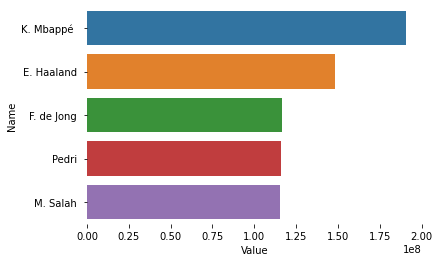

In [143]:
sb.barplot(data=a,y='Name',x='Value')
plt.box(False)

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Name',y = '',data=df, palette='Blues_r')

In [143]:
df1=copy.deepcopy(df)

In [144]:
df1['national'].nunique()

152

In [145]:
#df1[df1.national == 'United States'].Team

In [146]:
df1['national'].value_counts()

England                     1051
Germany                      952
Spain                        930
France                       825
Brazil                       677
United States                658
Italy                        561
Netherlands                  560
Argentina                    541
Poland                       505
China PR                     494
Portugal                     469
Turkey                       453
Sweden                       440
Norway                       430
Japan                        423
Denmark                      395
Korea Republic               369
Saudi Arabia                 341
Czech Republic               286
Ukraine                      263
Russia                       259
Finland                      255
Hungary                      251
Romania                      235
Uruguay                      218
Hong Kong                    207
Belgium                      198
Republic of Ireland          197
Mexico                       178
Austria   

In [147]:
df1

,Name,Age,Overall_rating,Potential,ID,Height,Weight,foot,Best_overall,Best_position,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,Weak_foot,Skill_moves,Attacking_WorkRate,Defensive_WorkRate,IR,Body Type,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribling/Reflexes,Defending/Pace,Physical/Positioning,national,Team,end_year,day,month,year,dayofweek,quarter
0,J. Musiala,19,81,90,256790,183,70,Right,83,CAM,9,55500000.0,39000.0,102700000.0,337,66,76,49,83,63,361,88,64,48,75,86,416,79,72,91,82,92,329,71,55,77,53,73,329,59,65,76,78,51,82,196,64,63,69,42,6,9,8,8,11,2010,434,4,4,Medium,Medium,1,Lean,75,73,75,87,63,60,United States,FC Bayern München,2026,3,6,2020,2,2
1,K. Koné,21,77,86,250723,185,80,Right,79,CAM,9,23500000.0,21000.0,44700000.0,342,70,71,68,78,55,363,84,70,50,77,82,369,75,67,76,75,76,355,74,70,75,68,68,339,71,67,69,78,54,76,208,64,74,70,51,11,10,11,9,10,2027,435,3,4,High,High,1,Lean,71,69,74,81,69,70,Germany,Borussia Mönchengladbach,2025,21,1,2021,3,1
2,K. Kvaratskhelia,21,74,84,247635,183,70,Right,76,CAM,10,9500000.0,33000.0,18100000.0,326,69,66,62,74,55,366,81,78,59,68,80,383,83,79,83,67,71,328,70,59,67,68,64,302,61,37,69,72,63,73,114,41,39,34,54,9,15,8,14,8,1873,405,5,4,Medium,Medium,1,Normal,81,66,71,79,41,66,United States,Napoli,2027,1,7,2022,4,3
3,M. Mudryk,21,74,84,246340,175,61,Right,75,RM,10,9500000.0,700.0,22800000.0,286,69,66,39,65,47,342,80,58,63,63,78,400,89,87,84,67,73,303,67,60,64,53,59,284,62,28,69,73,52,70,141,51,52,38,49,10,12,14,6,7,1805,399,4,4,High,Medium,1,Lean,88,63,67,78,44,58,France,Shakhtar Donetsk,2026,29,10,2018,0,4
4,R. Cherki,18,73,88,251570,176,71,Left,74,CAM,15,7000000.0,19000.0,17700000.0,288,70,64,28,69,57,374,86,77,73,59,79,375,73,68,82,69,83,291,76,31,53,65,66,277,57,22,69,68,61,75,57,19,23,15,43,7,14,6,8,8,1705,368,5,5,High,Low,1,Stocky,70,67,68,82,21,59,Spain,Olympique Lyonnais,2023,7,7,2019,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17210,C. Cappis,22,65,73,246310,185,72,Left,67,CM,8,1600000.0,4000.0,2300000.0,274,55,48,55,70,46,294,64,55,41,67,67,332,66,70,64,67,65,291,52,58,71,62,48,292,68,62,61,61,40,63,175,55,65,55,46,5,13,11,12,5,1704,369,3,2,Medium,Medium,1,Normal,68,49,63,65,59,65,Scotland,Brøndby IF,2025,1,7,2021,3,3
17211,T. Wiesner,24,73,76,246183,176,72,Right,74,RM,3,3800000.0,750.0,8600000.0,314,73,65,58,70,48,304,74,52,43,63,72,397,84,80,83,71,79,336,69,77,76,52,62,317,66,68,69,68,46,70,200,65,67,68,53,12,9,14,11,7,1921,415,2,2,High,Low,1,Lean,82,64,67,74,66,62,Egypt,AC Sparta Praha,2023,1,7,2015,2,3
17212,E. Centurión,25,69,72,246236,184,79,Right,69,GK,3,1400000.0,6000.0,2100000.0,80,11,7,12,34,16,103,24,20,14,24,21,248,52,45,45,66,40,232,49,72,36,69,6,104,33,11,7,35,18,43,38,10,11,17,341,72,66,65,69,69,1146,389,2,1,Medium,Medium,1,Normal,72,66,65,69,48,69,Denmark,River Plate,2024,19,10,2018,4,4
17213,A. Long,21,58,66,246052,184,85,Right,60,CB,8,425000.0,2000.0,829000.0,184,35,19,54,52,24,199,45,29,29,48,48,266,55,54,46,53,58,268,42,72,55,74,25,209,52,56,29,40,32,50,172,58,58,56,51,13,13,7,11,7,1349,292,3,2,Low,High,1,Stocky,54,26,43,47,57,65,England,Doncaster Rovers,2024,17,7,2022,6,3


# Enoding Categorical variables

In [160]:
#Encoding nationality by giving threshold values
vc = df1['national'].value_counts()
top = vc[vc > 286].index.tolist()
low = vc[vc < 99].index.tolist()

def min_nation(n):
    if (n['national'] in top):
        return 2
    elif (n['national'] in low):
        return 0
    else:
        return 1
    
df1['Nation_level'] = df1.apply(min_nation,axis = 1)

In [161]:
df1['foot']=df1['foot'].map({'Right':1,'Left':0})

In [162]:
df1['Attacking_WorkRate']=df1['Attacking_WorkRate'].map({'High':2,'Medium':1,'Low':0})

In [163]:
df1['Defensive_WorkRate']=df1['Defensive_WorkRate'].map({'High':2,'Medium':1,'Low':0})

In [164]:
df1['Body Type']=df1['Body Type'].map({'Unique':3,'Normal ':2,'Lean ':1,'Stocky ':0})

In [165]:
df1.head()

,Name,Age,Overall_rating,Potential,ID,Height,Weight,foot,Best_overall,Best_position,Growth,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total,Base Stats,Weak_foot,Skill_moves,Attacking_WorkRate,Defensive_WorkRate,IR,Body Type,Pace/Diving,Shooting/Handling,Passing/Kicking,Dribling/Reflexes,Defending/Pace,Physical/Positioning,national,Team,end_year,day,month,year,dayofweek,quarter,Nation_level
0,J. Musiala,19,81,90,256790,183,70,1,83,CAM,9,55500000.0,39000.0,102700000.0,337,66,76,49,83,63,361,88,64,48,75,86,416,79,72,91,82,92,329,71,55,77,53,73,329,59,65,76,78,51,82,196,64,63,69,42,6,9,8,8,11,2010,434,4,4,1,1,1,1,75,73,75,87,63,60,United States,FC Bayern München,2026,3,6,2020,2,2,2
1,K. Koné,21,77,86,250723,185,80,1,79,CAM,9,23500000.0,21000.0,44700000.0,342,70,71,68,78,55,363,84,70,50,77,82,369,75,67,76,75,76,355,74,70,75,68,68,339,71,67,69,78,54,76,208,64,74,70,51,11,10,11,9,10,2027,435,3,4,2,2,1,1,71,69,74,81,69,70,Germany,Borussia Mönchengladbach,2025,21,1,2021,3,1,2
2,K. Kvaratskhelia,21,74,84,247635,183,70,1,76,CAM,10,9500000.0,33000.0,18100000.0,326,69,66,62,74,55,366,81,78,59,68,80,383,83,79,83,67,71,328,70,59,67,68,64,302,61,37,69,72,63,73,114,41,39,34,54,9,15,8,14,8,1873,405,5,4,1,1,1,2,81,66,71,79,41,66,United States,Napoli,2027,1,7,2022,4,3,2
3,M. Mudryk,21,74,84,246340,175,61,1,75,RM,10,9500000.0,700.0,22800000.0,286,69,66,39,65,47,342,80,58,63,63,78,400,89,87,84,67,73,303,67,60,64,53,59,284,62,28,69,73,52,70,141,51,52,38,49,10,12,14,6,7,1805,399,4,4,2,1,1,1,88,63,67,78,44,58,France,Shakhtar Donetsk,2026,29,10,2018,0,4,2
4,R. Cherki,18,73,88,251570,176,71,0,74,CAM,15,7000000.0,19000.0,17700000.0,288,70,64,28,69,57,374,86,77,73,59,79,375,73,68,82,69,83,291,76,31,53,65,66,277,57,22,69,68,61,75,57,19,23,15,43,7,14,6,8,8,1705,368,5,5,2,0,1,0,70,67,68,82,21,59,Spain,Olympique Lyonnais,2023,7,7,2019,6,3,2


Grouping different positions by domain knowledge and encoded it

In [167]:
def position_type(p):
    if (p['Best_position']=='GK'):
        return 'G'
    elif ((p['Best_position']=='CB') | (p['Best_position']=='RB') | (p['Best_position']=='LB') | (p['Best_position']=='RWB') | (p['Best_position']=='LWB')):
        return 'D'
    elif ((p['Best_position']=='CM') | (p['Best_position']=='CDM') | (p['Best_position']=='CAM')| (p['Best_position']=='RM') | (p['Best_position']=='LM')):
        return 'M'
    elif ((p['Best_position']=='ST') | (p['Best_position']=='CF') | (p['Best_position']=='RW') | (p['Best_position']=='LW')):
        return 'F'
    else:
        return 0
    
df1['Best_position'] = df1.apply(position_type,axis = 1)

In [168]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [170]:
e = ohe.fit_transform(df1[['Best_position']])

In [171]:
e

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [172]:
x = ohe.get_feature_names(['Position'])

In [173]:
encoded = pd.DataFrame(e,columns=x)

In [174]:
encoded

,Position_F,Position_G,Position_M
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17210,0,0,1
17211,0,0,1
17212,0,1,0
17213,0,0,0


Concatenating encoded dataframe with main dataframe

In [175]:
df1=pd.concat([df1,encoded],axis=1)

In [177]:
#droping columns
df1.drop(['Name','ID','Best_position','national','Team'],inplace=True,axis=1)

In [192]:
#df1.to_csv('n1.csv',index=False)